![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

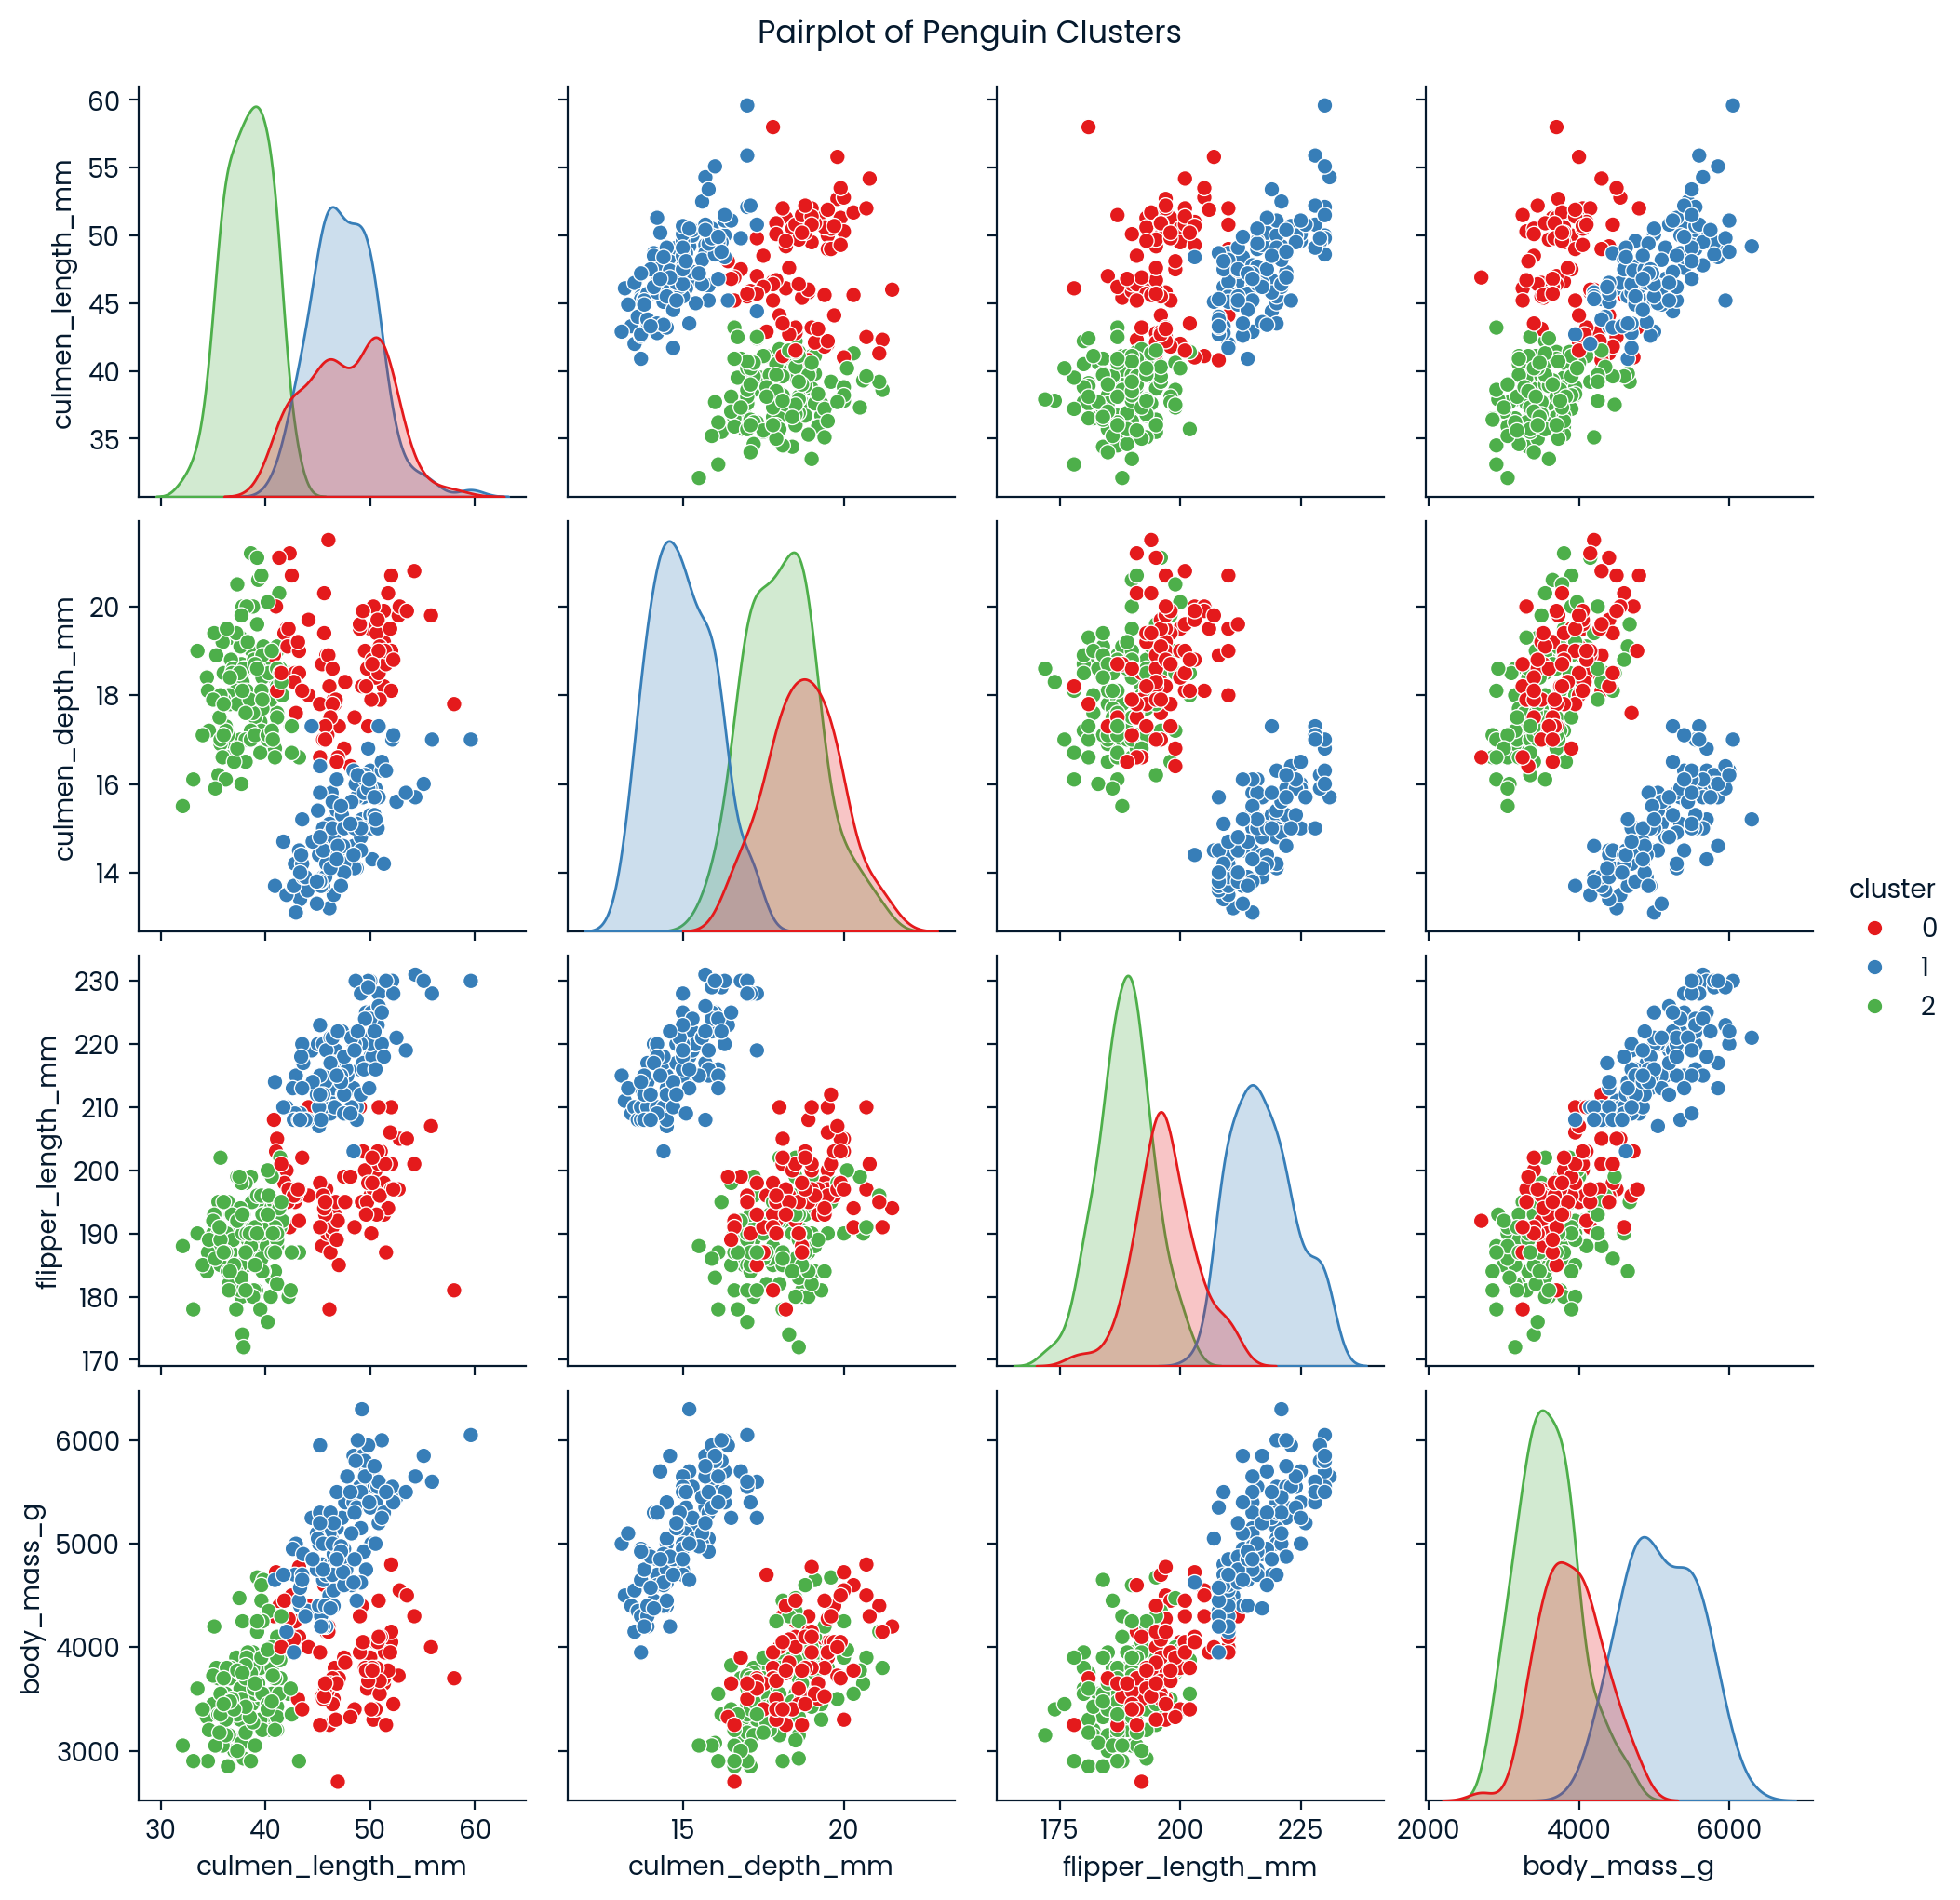

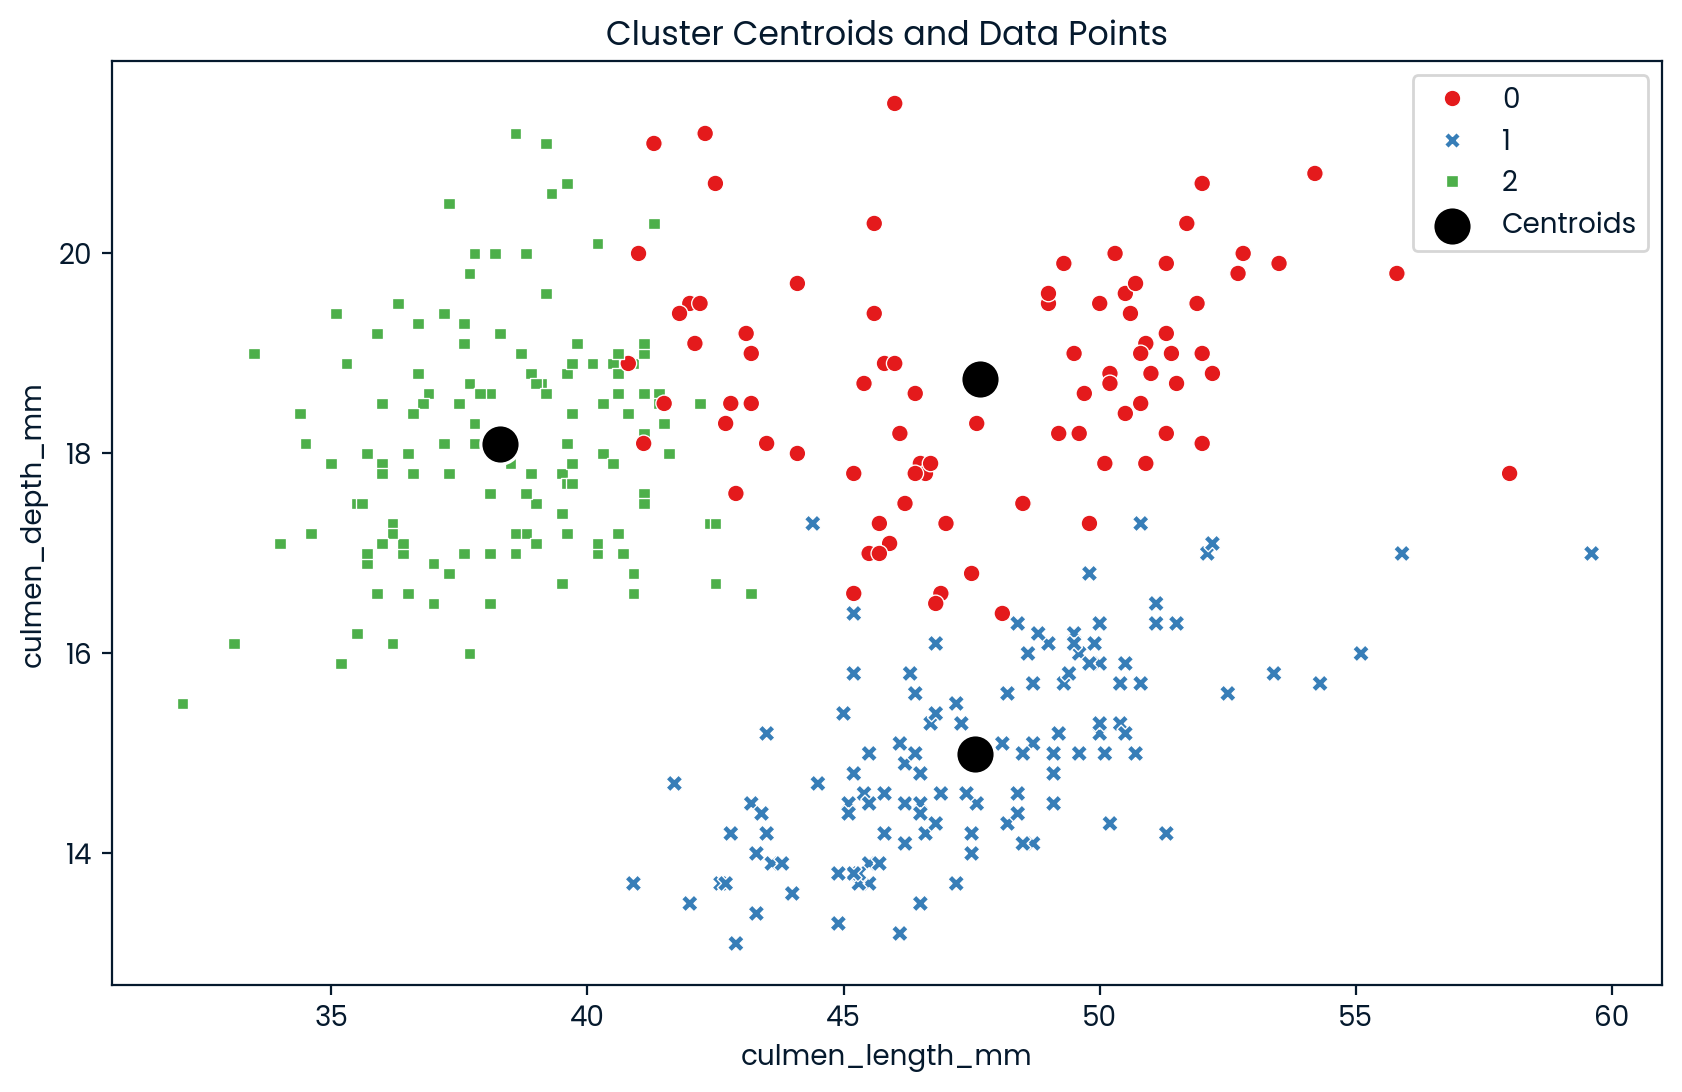

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


In [6]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins = pd.read_csv("penguins.csv")
penguins.head()
penguins.describe()




# Drop any rows with missing values
penguins = penguins.dropna()

# Step 2: Standardize the data
# Select only the numeric columns for clustering
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Standardize the numeric columns
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins[numeric_cols])

# Step 3: Perform cluster analysis using KMeans
# Set the number of clusters (e.g., 3 clusters for the three species of penguins)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the standardized data
kmeans.fit(penguins_scaled)

# Add the cluster labels to the original dataset
penguins['cluster'] = kmeans.labels_

# Step 4: Collect the average values for the clusters
# Group by the cluster labels and calculate the mean for each cluster
stat_penguins = penguins.groupby('cluster')[numeric_cols].mean()

# Step 5: Visualize the clusters
# Create a pairplot to visualize the clusters
sns.pairplot(penguins, hue='cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Penguin Clusters', y=1.02)
plt.show()

# Plot the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=numeric_cols)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='Set1', style='cluster')
sns.scatterplot(data=centroids_df, x='culmen_length_mm', y='culmen_depth_mm', s=200, color='black', label='Centroids')
plt.title('Cluster Centroids and Data Points')
plt.show()

# Step 6: Output the results
print(stat_penguins)

# Save the results to a CSV file
stat_penguins.to_csv('stat_penguins.csv')

